In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from tqdm import tqdm
from torch.utils.data import DataLoader

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from src.model.resnet import ResNet152
from src.dataloader.unc_landmarks import UNCLandmarksDataset


N_CLASSES = 5
DEVICE    = 2

model     = torch.load("/playpen-ssd/levi/comp790-183/unc-landmark-recognition/__exps__/2025-11-09_19-43-23_resnet152-bs16-lr1e-5-N=5/best.pth", weights_only=False)

# init model weights from checkpoint
# model._parameters = weights

ds = UNCLandmarksDataset("val")
model.cuda(DEVICE);


dl = DataLoader(ds, num_workers=0, batch_size=1)

y_test      = []
predictions = []

with torch.no_grad():
    for sample in tqdm(dl):
        y_test.append(sample["y"])
        X = sample["X"].float().cuda(DEVICE)
        y_hat = model(X)
        predictions.append(y_hat)

100%|██████████| 165/165 [04:57<00:00,  1.80s/it]


In [2]:
import torch.nn.functional as F


# array of int (e.g., 4, 4, 2, 0, 1))
preds     = [torch.argmax(x, dim=1).item() for x in predictions]

# array of int (e.g., (4, 4, 2, 0, 1))
y_hat_int = [torch.argmax(x).item() for x in y_test]

In [3]:
predictions

[tensor([[-1.3319, -0.6646,  4.5319, -0.4197, -1.2656]], device='cuda:2'),
 tensor([[-1.2411, -0.6992,  4.5024, -0.4191, -1.2799]], device='cuda:2'),
 tensor([[-1.3013, -0.7250,  4.5854, -0.2954, -1.2739]], device='cuda:2'),
 tensor([[-1.2838, -0.6364,  4.5227, -0.3645, -1.2713]], device='cuda:2'),
 tensor([[-1.2485, -0.6562,  4.4871, -0.3925, -1.2077]], device='cuda:2'),
 tensor([[-1.2905, -0.6674,  4.5772, -0.4033, -1.2822]], device='cuda:2'),
 tensor([[-1.2331, -0.6643,  4.4551, -0.4405, -1.2575]], device='cuda:2'),
 tensor([[-1.2914, -0.6588,  4.4998, -0.3855, -1.2217]], device='cuda:2'),
 tensor([[-1.3348, -0.6495,  4.5121, -0.4007, -1.2607]], device='cuda:2'),
 tensor([[-1.2378, -0.6318,  4.4795, -0.3665, -1.2092]], device='cuda:2'),
 tensor([[-1.2947, -0.5932,  4.4568, -0.3944, -1.2361]], device='cuda:2'),
 tensor([[-1.2400, -0.6877,  4.5183, -0.3817, -1.1979]], device='cuda:2'),
 tensor([[-1.2912, -0.6880,  4.4734, -0.3315, -1.2573]], device='cuda:2'),
 tensor([[-1.2672, -0.671

Plotting confusion matrix...


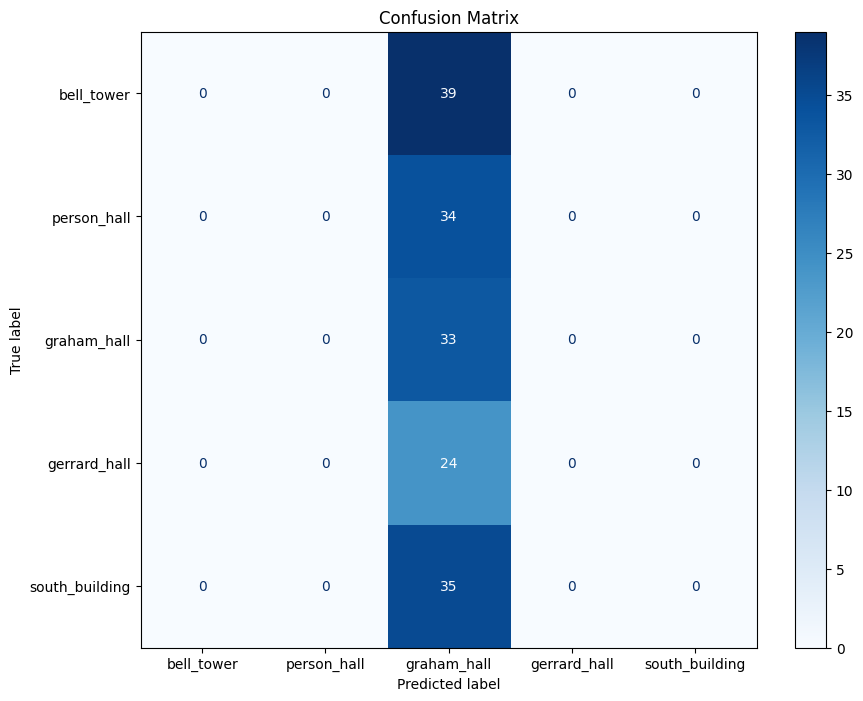

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


# --- Plot the Matrix ---
print("Plotting confusion matrix...")

# Optional: Define display labels if you have them
class_names = ['bell_tower','person_hall','graham_hall', 'gerrard_hall', 'south_building']

fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(
    y_hat_int,    # True labels
    preds,        # Predicted labels
    ax=ax,
    cmap='Blues',  # Color map
    display_labels=class_names # Uncomment this to use text labels
)

plt.title("Confusion Matrix")
plt.show()